# $$Relatório~de~Felicidade~da~América~do~Sul~2021$$

### $$O~que~faz~os~cidadãos~sul~americanos~felizes?$$

fonte dos dados: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021?datasetId=1222432&sortBy=voteCount

### $Introdução$

- O Relatório Mundial da Felicidade (em inglês: World Happiness Report) é uma medição da felicidade publicado pela Rede de Soluções para o Desenvolvimento Sustentável da ONU (SDSN, na sigla em inglês), com base em dados coletados pelo Gallup World Poll.

- Os dados são coletados de pessoas em mais de 150 países (em 2021 foram 156) e cada variável mensurada revela uma pontuação média ponderada por população numa escala de 0 a 10, que é monitorada com o passar do tempo e comparada com a de outros países. Atualmente, essas variáveis incluem: PIB per capita real, assistência social, expectativa de vida saudável, liberdade para fazer escolhas, generosidade e percepções de corrupção. 

- O resultado do ranking global de felicidade depende, exclusivamente, da avaliação individual das pessoas nos últimos três anos. Então, ao falarmos da edição de 2020, o índice considera os dados de 2017 a 2019. Simplificando, é como pedir para alguém responder, de 0 a 10, quão satisfeito está com a sua vida hoje, onde ‘10’ representa a melhor situação possível e ‘0’ representa a pior situação possível. Para facilitar o processo, os especialistas utilizaram a Escala da Escada (Cantril Ladder Scale).

- Este notebook tem como objetivo criar visualizações de dados referentes às métricas de felicidade fornecidas pela Organização das Nações Unidas (ONU) para os países da América do Sul em 2021.

#### $Variáveis$
<ol>
   <li> Ladder score: Pontuação de felicidade ou bem-estar subjetivo. Esta é a média nacional à questão das avaliações de vida.
   <li> Log GDP per Capita: Série temporal do PIB per capita de 2019 a 2020 usando previsões específicas do país de crescimento real do PIB em 2020.
   <li> Social Support: Sensação de suporte de familiares ou amigos em momentos de necessidade e/ou lazer.
   <li> Healthy life expectancy: Dados utilizados da Organização Mundial da Saúde (OMS).
   <li> Freedom to make life choices: Sensação de que cada pessoa possui liberdade de fazer o que bem entender.
   <li> Generosity: Sensação de generosidade e altruísmo das pessoas.
   <li> Perceptions of corruption: Como os cidadãos percebem a corrupção no governo, em entidades e nos negócios.
</ol>
fonte dos conceitos de cada variável: https://canaldafelicidade.com.br/relatorio-mundial-da-felicidade/

### $Descrição~do~dataset$

- Existem 2 conjuntos de dados no Kaggle:

    world-happiness-report-2021.csv: contém informações sobre métricas de felicidade em 2021.
    
    world-happiness-report.csv: contém informações históricas sobre métricas de felicidade de 2005-2020.

In [1]:
# cores que serão utilizadas nos plots
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3', '#132C33', '#9E1717']
colors_dark = ["#1F1F1F", "#313131", '#636363']

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

### Lendo o dataset

In [3]:
dataset = pd.read_csv('world-happiness-report-2021.csv')

In [4]:
# selecionando somente os paises da América do Sul
paises_sulAmericanos = ['Uruguay', 'Brazil', 'Chile', 'Colombia', 'Argentina', 'Peru', 'Ecuador', 'Bolivia', 'Paraguay', 'Venezuela']

america_do_sul = dataset[dataset['Country name'].isin(paises_sulAmericanos)]
america_do_sul = america_do_sul.reset_index(drop=True)

In [5]:
# visualizando os dados
america_do_sul.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Uruguay,Latin America and Caribbean,6.431,0.046,6.521,6.341,9.966,0.925,69.100,0.896,-0.092,0.590,2.43,1.164,1.042,0.649,0.625,0.128,0.223,2.600
1,Brazil,Latin America and Caribbean,6.330,0.043,6.415,6.245,9.577,0.882,66.601,0.804,-0.071,0.756,2.43,1.028,0.944,0.571,0.514,0.142,0.117,3.015
2,Chile,Latin America and Caribbean,6.172,0.046,6.262,6.081,10.071,0.882,70.000,0.742,-0.044,0.830,2.43,1.200,0.946,0.678,0.438,0.159,0.070,2.682
3,Colombia,Latin America and Caribbean,6.012,0.061,6.132,5.892,9.557,0.847,68.001,0.837,-0.135,0.841,2.43,1.021,0.866,0.615,0.554,0.100,0.063,2.794
4,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461


- Para o relatório mundial da felicidade 6 variáveis afetam a felicidade dos cidadãos da América do Sul, são elas:
<ol>
    <li> Log GDP per Capita
    <li> Social Support
    <li> Healthy life expectancy
    <li> Freedom to make life choices
    <li> Generosity
    <li> Perceptions of corruption
</ol>

In [6]:
# selecionando as colunas desejadas
colunas = ['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

america_do_sul = america_do_sul[colunas]

In [7]:
america_do_sul.head()

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Uruguay,6.431,9.966,0.925,69.100,0.896,-0.092,0.590
1,Brazil,6.330,9.577,0.882,66.601,0.804,-0.071,0.756
2,Chile,6.172,10.071,0.882,70.000,0.742,-0.044,0.830
3,Colombia,6.012,9.557,0.847,68.001,0.837,-0.135,0.841
4,Argentina,5.929,9.962,0.898,69.000,0.828,-0.182,0.834


In [8]:
america_do_sul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  10 non-null     object 
 1   Ladder score                  10 non-null     float64
 2   Logged GDP per capita         10 non-null     float64
 3   Social support                10 non-null     float64
 4   Healthy life expectancy       10 non-null     float64
 5   Freedom to make life choices  10 non-null     float64
 6   Generosity                    10 non-null     float64
 7   Perceptions of corruption     10 non-null     float64
dtypes: float64(7), object(1)
memory usage: 768.0+ bytes


**Serão analisados 10 países como consta na célula acima.**

In [9]:
# estatísticas do dataset
america_do_sul.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Ladder score,10.0,5.874,0.432,4.892,5.728,5.884,6.132,6.431
Logged GDP per capita,10.0,9.547,0.361,9.046,9.347,9.508,9.866,10.071
Social support,10.0,0.865,0.037,0.810,0.836,0.871,0.890,0.925
Healthy life expectancy,10.0,67.625,1.837,63.901,66.626,68.126,68.950,70.000
Freedom to make life choices,10.0,0.814,0.082,0.615,0.808,0.832,0.867,0.896
Generosity,10.0,-0.102,0.064,-0.182,-0.149,-0.108,-0.072,0.028
Perceptions of corruption,10.0,0.813,0.086,0.590,0.828,0.836,0.842,0.891


#### verificando se há dados duplicados e nulos

In [10]:
america_do_sul.duplicated().sum()

0

In [11]:
america_do_sul.isnull().sum()

Country name                    0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### **Análise**

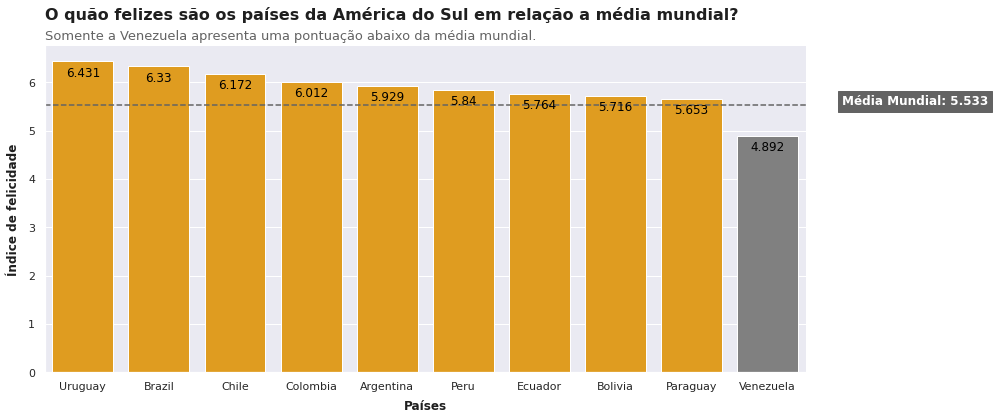

In [12]:
media_mundial = dataset['Ladder score'].mean()
num = america_do_sul['Ladder score']

cores = ['gray' if num < media_mundial else 'orange' for num in america_do_sul['Ladder score']]

plt.figure(figsize = (14, 6))

ax = sns.barplot(data=america_do_sul, x='Country name', y='Ladder score', palette=cores)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

line  = ax.axhline(media_mundial, linestyle='--', color=colors_dark[2])
avgl = ax.text(s='Média Mundial: {:.3f}'.format(media_mundial),
                x=xmax*1.05, y=media_mundial,
                fontsize=12, backgroundcolor=colors_dark[2],
                fontweight='bold', color='white')

ax.set_ylabel('Índice de felicidade', fontsize=12, labelpad=8, fontweight='bold', color=colors_dark[0])
ax.set_xlabel('Países', fontsize=12, labelpad=8, fontweight='bold', color=colors_dark[0])

plt.text(s='O quão felizes são os países da América do Sul em relação a média mundial?', 
         ha='left', x=xmin, y=ymax*1.08, fontsize=16, fontweight='bold', color=colors_dark[0])
plt.title('Somente a Venezuela apresenta uma pontuação abaixo da média mundial.', loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()

for i in ax.patches: # add os valores de cada país na barra
    ax.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='baseline', fontsize=12,
                color='black', xytext=(0,-15),
                textcoords='offset points')
    
sns.despine()
plt.show()

##### **Agora vamos dar uma olhada no Índice de Felicidade de 2005-2020, para obter mais informações sobre o movimento no ranking de felicidade no passado.**

In [13]:
dataset1 = pd.read_csv('world-happiness-report.csv')
america_do_sul_anos = dataset1[dataset1['Country name'].isin(paises_sulAmericanos)]
america_do_sul_anos = america_do_sul_anos.reset_index(drop=True)
america_do_sul_anos.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Argentina,2006,6.313,9.942,0.938,66.82,0.733,-0.157,0.852,0.825,0.328
1,Argentina,2007,6.073,10.018,0.862,66.94,0.653,-0.141,0.881,0.828,0.279
2,Argentina,2008,5.961,10.048,0.892,67.06,0.678,-0.132,0.865,0.823,0.318
3,Argentina,2009,6.424,9.977,0.919,67.18,0.637,-0.130,0.885,0.864,0.237
4,Argentina,2010,6.441,10.066,0.927,67.30,0.730,-0.126,0.855,0.846,0.211


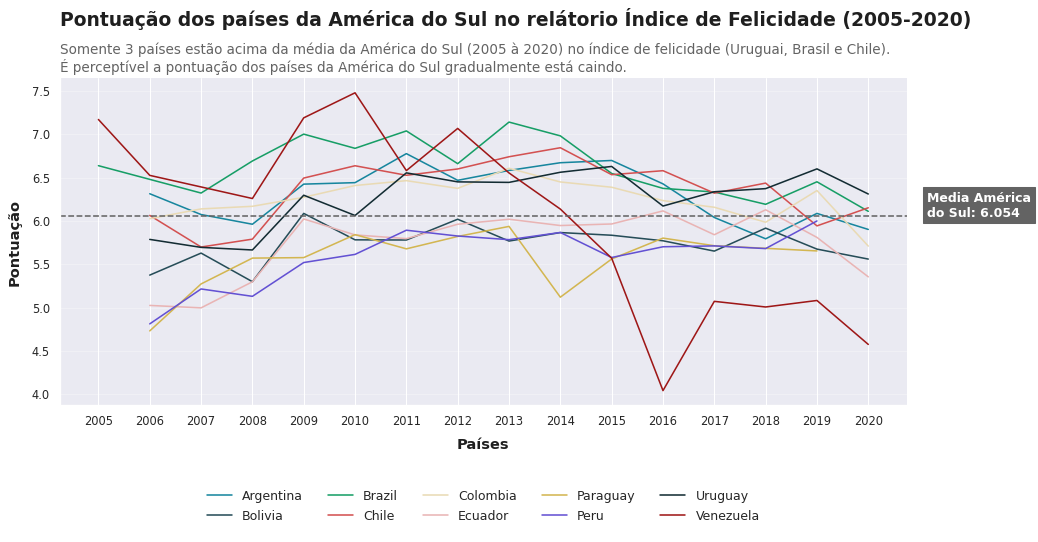

In [14]:
media_america_sul = america_do_sul_anos['Life Ladder'].mean()

fig, ax = plt.subplots(figsize=(14, 8), dpi=75)

line0 = sns.lineplot(data=america_do_sul_anos, x='year', y='Life Ladder', hue='Country name', ax=ax, palette=colors_mix)
line1 = ax.axhline(media_america_sul, linestyle='--', alpha=1, color=colors_dark[2])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Países", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Pontuação", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_xticks([i for i in range(2005, 2021)]) # configurando os anos

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl = ax.text( s="Media América\ndo Sul: {:.3f}".format(media_america_sul), x=xmax+0.4, y=media_america_sul, backgroundcolor=colors_dark[2],
                fontsize=12, fontweight='bold', color='white')

plt.text(s='Pontuação dos países da América do Sul no relátorio Índice de Felicidade (2005-2020)', ha='left', x=xmin, y=ymax*1.08, fontsize=18, fontweight='bold', color=colors_dark[0])
plt.title('Somente 3 países estão acima da média da América do Sul (2005 à 2020) no índice de felicidade (Uruguai, Brasil e Chile).\nÉ perceptível a pontuação dos países da América do Sul gradualmente está caindo.', 
          loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()

sns.despine()
plt.show()

- Neste gráfico, é possível perceber o quanto a **Venezuela** caiu no ranking de felicidade ao passar dos anos devido aos conflitos internos no país.
- O **Brasil** desde o ano de 2005 intercala entre a 1ª e a 3ª posição no ranking na América do Sul. (Somente em 2006 o Brasil não participou do relátorio).

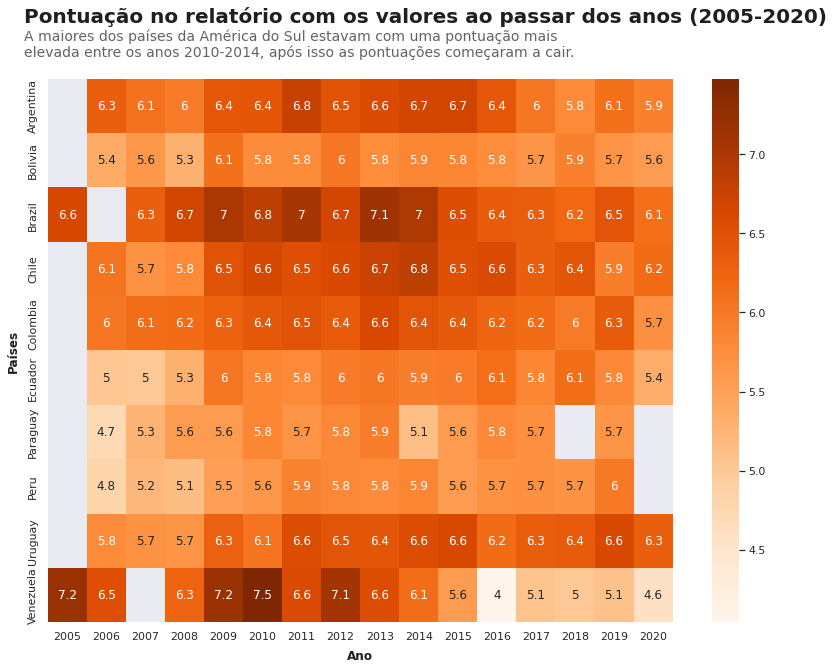

In [15]:
plt.figure(figsize=(14,10))

sns.heatmap(america_do_sul_anos.pivot_table(index='Country name', columns='year')['Life Ladder'], annot=True, cmap='Oranges')

plt.suptitle('Pontuação no relatório com os valores ao passar dos anos (2005-2020)',fontsize=20, fontweight='bold', color=colors_dark[0])
plt.text(s='A maiores dos países da América do Sul estavam com uma pontuação mais\nelevada entre os anos 2010-2014, após isso as pontuações começaram a cair.', 
         ha='left', x=-0.6, y=-0.4, fontsize=14, color=colors_dark[2])

plt.xlabel('Ano', labelpad=8, fontweight='bold', color=colors_dark[0])
plt.ylabel('Países', labelpad=8, fontweight='bold', color=colors_dark[0])

plt.show()

#### **Correlação**

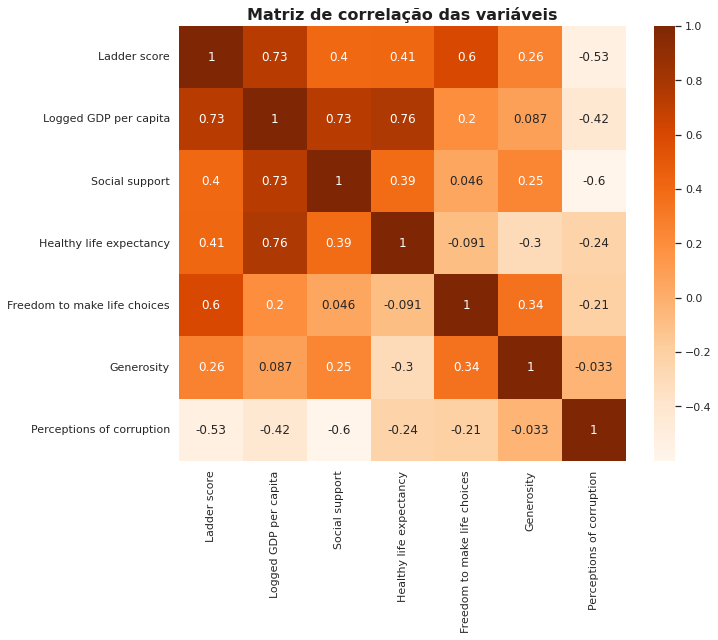

In [16]:
correlacao = america_do_sul.corr()

plt.figure(figsize=(10, 8))

ax = sns.heatmap(correlacao, annot=True, cmap='Oranges')
plt.title('Matriz de correlação das variáveis', fontsize=16, fontweight='bold', color=colors_dark[0])

plt.show()

- Segundo o mapa de calor de correlação das variáveis, três variáveis apresentam uma boa correlação positiva em relação ao Índice de Felicidade, que são elas:
    - GDP per capita
    - Freedom to make life choices
    - Healthy life expectancy
    
_Perceptions of corruption_ apresentou uma correlação bem negativa, vamos dar uma olhada no ranking dos países em cada uma dessas variáveis.

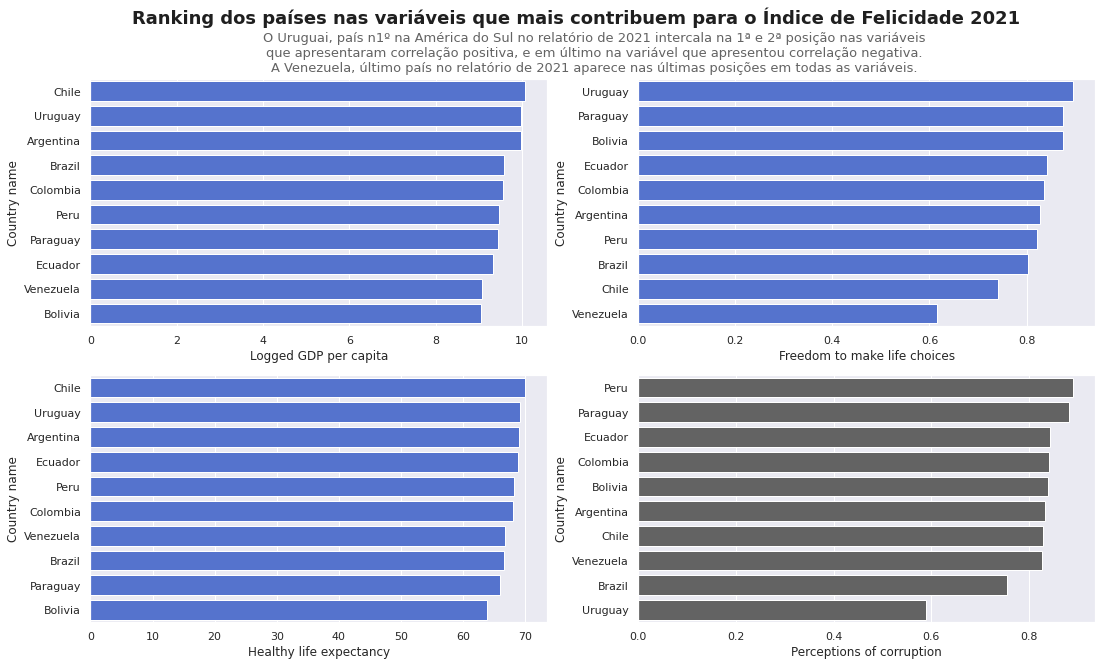

In [17]:
fix, ax = plt.subplots(2, 2, figsize=(18, 10))

sns.barplot(data=america_do_sul.sort_values('Logged GDP per capita', ascending=False), x='Logged GDP per capita', y='Country name', color='royalblue', ax=ax[0,0])

sns.barplot(data=america_do_sul.sort_values('Freedom to make life choices', ascending=False), x='Freedom to make life choices', y='Country name', color='royalblue', ax=ax[0,1])

sns.barplot(data=america_do_sul.sort_values('Healthy life expectancy', ascending=False), x='Healthy life expectancy', y='Country name', color='royalblue', ax=ax[1,0])

sns.barplot(data=america_do_sul.sort_values('Perceptions of corruption', ascending=False), x='Perceptions of corruption', y='Country name', color=colors_dark[2], ax=ax[1,1])

fix.suptitle('Ranking dos países nas variáveis que mais contribuem para o Índice de Felicidade 2021', fontsize=18, fontweight='bold', color=colors_dark[0])
plt.text(s='O Uruguai, país n1º na América do Sul no relatório de 2021 intercala na 1ª e 2ª posição nas variáveis\nque apresentaram correlação positiva, e em último na variável que apresentou correlação negativa.\nA Venezuela, último país no relatório de 2021 aparece nas últimas posições em todas as variáveis.', ha='center', x=-0.09, y=-12.8, fontsize=13, color=colors_dark[2])

plt.show()

- O **Brasil** é um caso interessante que precisa ser investigado com profundidade, pois aparece nas últimas posições em 2 das 3 variáveis com correlação positiva. Possivelmente o GDP per capita tenha alavancado a posição do país no ranking.

##### **Um gráfico de dispersão é a melhor maneira de descrever o impacto de cada métrica contra a classificação de felicidade.**

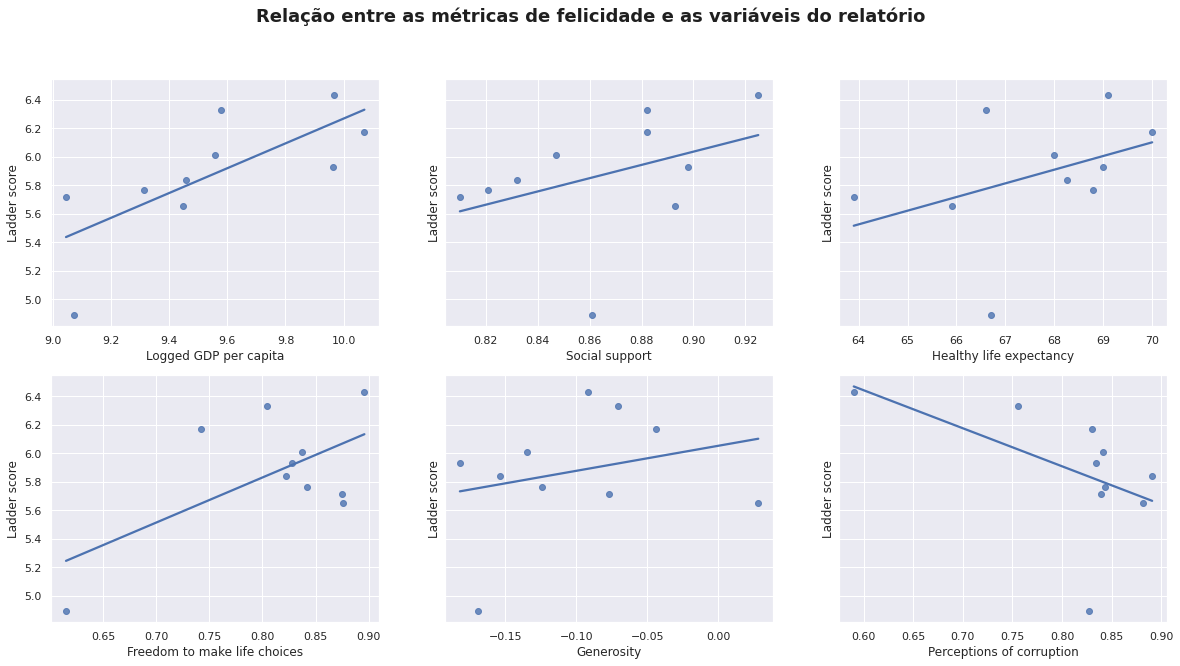

In [18]:
fix, ax = plt.subplots(2, 3, figsize=(20, 10), sharey = True)

sns.regplot(data=america_do_sul, x='Logged GDP per capita', y='Ladder score', ci=None, ax=ax[0,0])
sns.regplot(data=america_do_sul, x='Social support', y='Ladder score', ci=None, ax=ax[0,1])
sns.regplot(data=america_do_sul, x='Healthy life expectancy', y='Ladder score', ci=None, ax=ax[0,2])
sns.regplot(data=america_do_sul, x='Freedom to make life choices', y='Ladder score', ci=None, ax=ax[1,0])
sns.regplot(data=america_do_sul, x='Generosity', y='Ladder score', ci=None, ax=ax[1,1])
sns.regplot(data=america_do_sul, x='Perceptions of corruption', y='Ladder score', ci=None, ax=ax[1,2])

fix.suptitle('Relação entre as métricas de felicidade e as variáveis do relatório', fontsize=18, fontweight='bold', color=colors_dark[0])

plt.show()

Do gráfico de dispersão acima, mostra claramente que:
- GDP per Capita,
- Freedom to make life choices,
- Healthy life expectancy,
- Social support, <br>
tem impacto significativo nos níveis de felicidade (correlações positivas), portanto quanto maior o valor maior será a pontuação no Índice.

No entanto, o nível de Generosity não é tão impactante para os níveis de felicidade;

Perceptions of corruption apresentou correlação negativa.

##### **Vizualição dos países em cada variável**

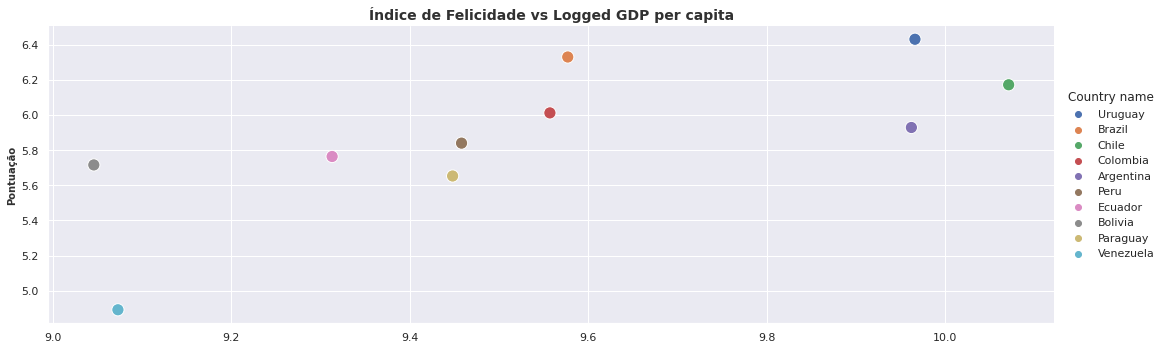

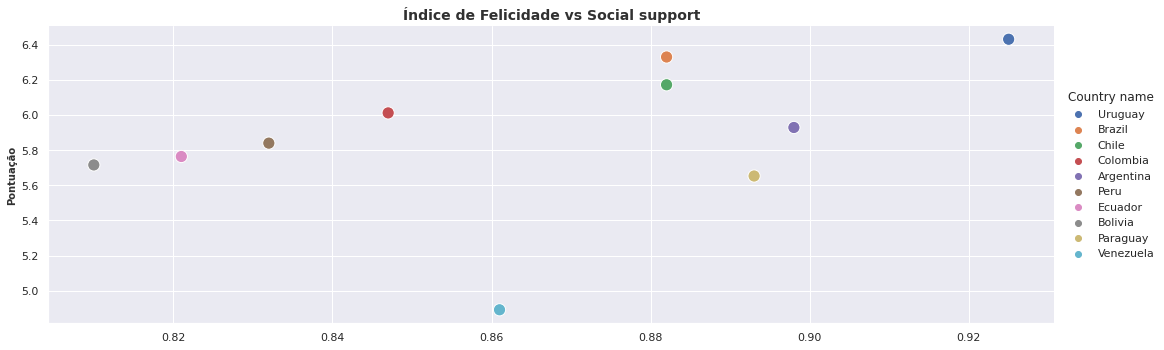

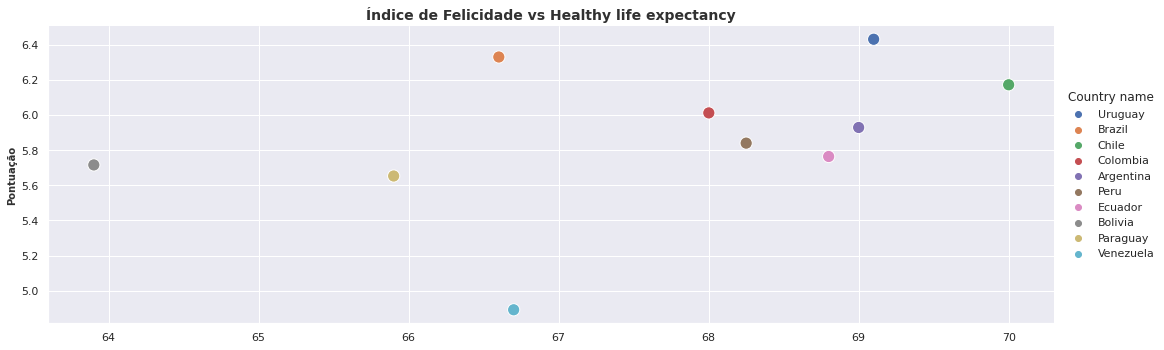

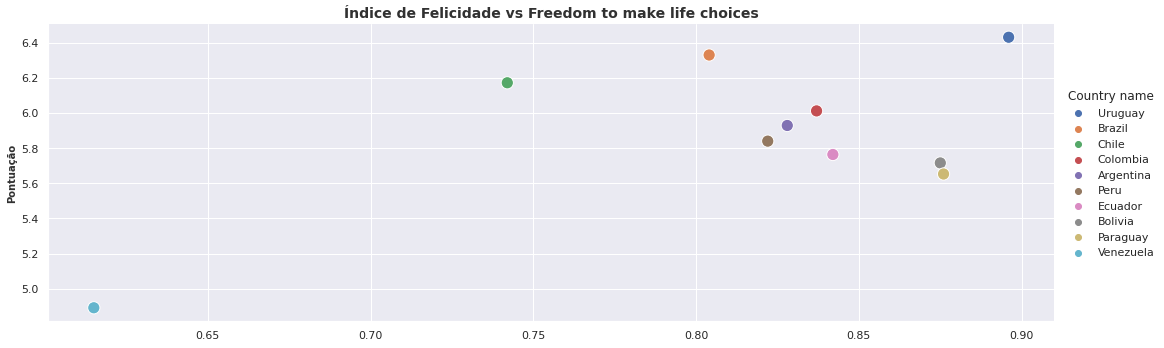

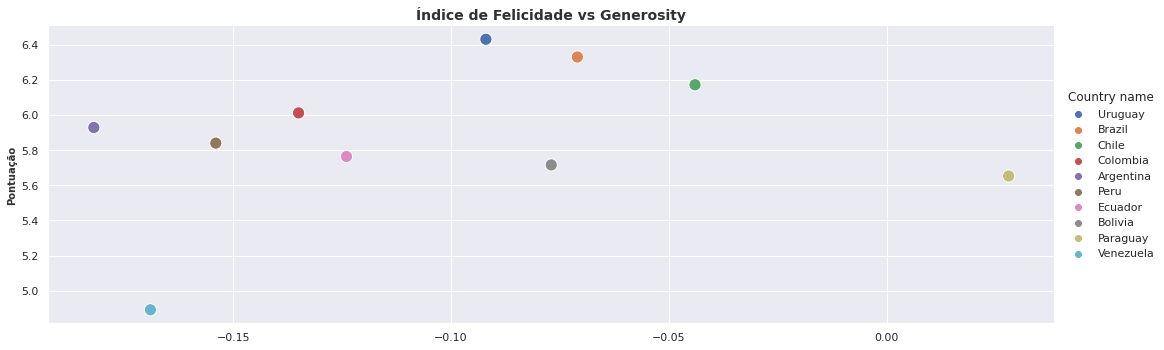

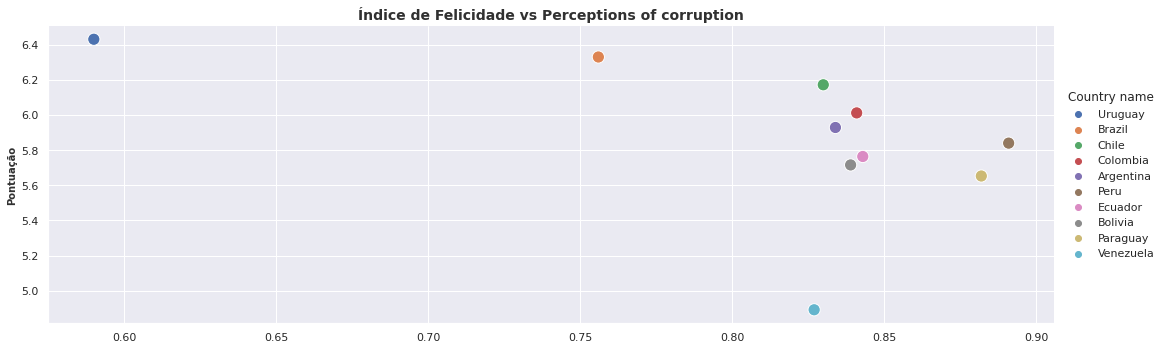

In [19]:
#plt.figure(figsize=(10,18))
for col in america_do_sul[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
                           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]:
    sns.relplot(data=america_do_sul, x=col, y='Ladder score', hue='Country name', s=150, height = 5, aspect = 3)
    plt.title(f'Índice de Felicidade vs {col}',fontsize=14, fontweight='bold', color=colors_dark[1])
    plt.ylabel('Pontuação',fontsize=10, fontweight='bold', color=colors_dark[1])
    plt.xlabel('')

#### **Visualizando a taxa de crescimento no relatório de felicidade (2011-2021)**

vamos olhar exatamente a uma década atrás.

In [20]:
america_sul_11_21 = america_do_sul[['Country name', 'Ladder score']].merge(america_do_sul_anos[['Country name', 'Life Ladder']][america_do_sul_anos['year'] == 2011], 
                                                                           how='inner', on='Country name')
#america_sul_11_21

In [21]:
def aumento_percentual(v_inicial, v_final):
    return round((v_final - v_inicial) / v_inicial * 100, 2)


america_sul_11_21['aumento percentual 2011-2021'] = aumento_percentual(america_sul_11_21['Life Ladder'], america_sul_11_21['Ladder score'])
#america_sul_11_21

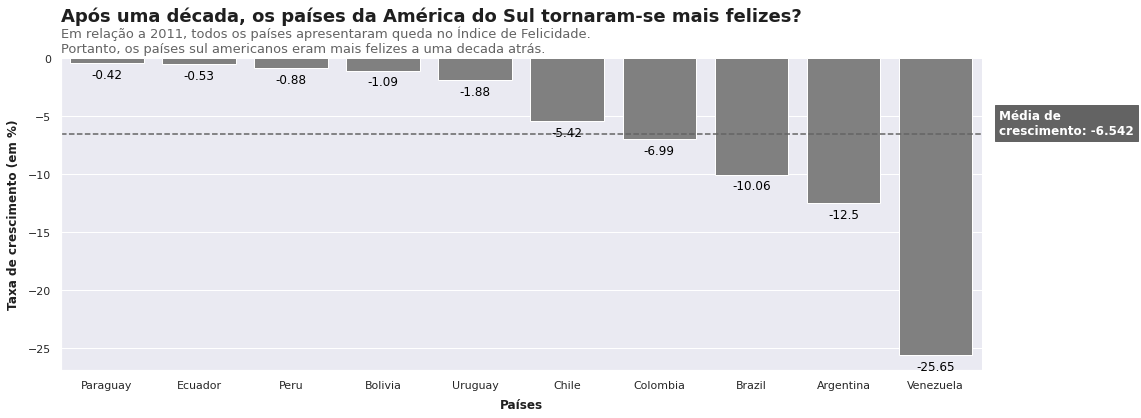

In [22]:
media_crescimento = america_sul_11_21['aumento percentual 2011-2021'].mean()
num = america_sul_11_21['aumento percentual 2011-2021'].sort_values(ascending=False)
cores = ['gray' if num < 0 else '#097419' for num in america_sul_11_21['aumento percentual 2011-2021'].sort_values(ascending=False)]

plt.figure(figsize = (16, 6))

ax = sns.barplot(data=america_sul_11_21.sort_values(by='aumento percentual 2011-2021', ascending=False), x='Country name', y='aumento percentual 2011-2021', palette=cores)

xmin, xmax = ax.get_xlim()
#ymin, ymax = ax.get_ylim()

line = ax.axhline(media_crescimento, linestyle='--', color=colors_dark[2])
avgl = ax.text(s='Média de\ncrescimento: {:.3f}'.format(media_crescimento),
                x=xmax*1.02, y=media_crescimento,
                fontsize=12, backgroundcolor=colors_dark[2],
                fontweight='bold', color='white')

ax.set_ylabel('Taxa de crescimento (em %)', fontsize=12, labelpad=8, fontweight='bold', color=colors_dark[0])
ax.set_xlabel('Países', fontsize=12, labelpad=8, fontweight='bold', color=colors_dark[0])

plt.text(s='Após uma década, os países da América do Sul tornaram-se mais felizes?', 
         ha='left', x=xmin, y=3.2, fontsize=18, fontweight='bold', color=colors_dark[0])
plt.title('Em relação a 2011, todos os países apresentaram queda no Índice de Felicidade.\nPortanto, os países sul americanos eram mais felizes a uma decada atrás.', 
          loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()

for i in ax.patches: # add os valores de cada país na barra
    ax.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='baseline', fontsize=12,
                color='black', xytext=(0,-15),
                textcoords='offset points')
    
sns.despine()
plt.show()

### **Conclusão**

- Algumas considerações:
    - **Uruguai** é o país mais feliz da América do Sul;
    - **Venezuela** é o pais mais infeliz da América do Sul;
    - Todas as métricas (exceto Generosity) desempenha um papel importante no ranking na América do Sul. **A métrica que possui o maior impacto é GDP per capita (PIB per capita)**;
    - O **Índice de Felicidade** dos países da **América do Sul está em declínio**.